# Data Dictionary

# [Link to download dataset!](https://www.kaggle.com/datasets/tanishqdublish/text-classification-documentation)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-za14{border-color:inherit;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-za14">Variable Name</th>
    <th class="tg-7zrl">Description</th>
    <th class="tg-7zrl">Data Type</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Class Name</td>
    <td class="tg-7zrl">The category of the e-commerce product. This is the target variable for classification.</td>
    <td class="tg-7zrl">Categorical/String</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Datapoint</td>
    <td class="tg-7zrl">The product name and description from the e-commerce website.</td>
    <td class="tg-7zrl">Text/String</td>
  </tr>
</tbody>
</table>

# Import necessary libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv


In [2]:
!pip install imblearn
!pip install imbalanced-learn==0.10.1
!pip install --upgrade imbalanced-learn
# Note: If you encountered a TypeError related to sklearn.svm._bounds.py,
# you might need to downgrade scikit-learn to a compatible version, e.g., 0.24.2
# !pip install scikit-learn==0.24.2
# !pip install nltk # Ensure nltk is installed if it's not already

import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    auc,
    roc_curve
)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD, PCA # Combined decomposition imports
import os
from wordcloud import WordCloud, STOPWORDS # Combined WordCloud imports
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Download NLTK data (if not already downloaded)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True) # Often needed for tokenization

# Assuming 'train' is your DataFrame with a 'Text' column
# If 'train' is not defined, replace this with your actual dataset loading code
# Example: train = pd.read_csv('your_dataset.csv')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 4.3 MB/s eta 0:00:00
  Attempti

2025-07-25 15:05:16.583031: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753455916.859538      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753455916.937978      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


True

# Load dataset

In [3]:
df = pd.read_csv('/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv')
df.head()

Household  \
0  Household   
1  Household   
2  Household   
3  Household   
4  Household   

  Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room.  
0  SAF 'Floral' Framed Painting (Wood, 30 inch x ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1  SAF 'UV Textured Modern Art Print Framed' Pain...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## Add column's name

In [4]:
# --- Assign the desired column names directly ---
# This is the key step to "add" column names on top of the data.
df.columns = ['Label', 'Text']

# Display the first few rows to verify
print(df.head())

       Label                                               Text
0  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
1  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
2  Household  SAF Flower Print Framed Painting (Synthetic, 1...
3  Household  Incredible Gifts India Wooden Happy Birthday U...
4  Household  Pitaara Box Romantic Venice Canvas Painting 6m...


# Split Dataset

In [5]:
# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (40339, 2)
test shape: (10085, 2)


# Data Visualization

## Basic information

In [6]:
train.isnull().sum()

Label    0
Text     1
dtype: int64

In [7]:
test.isnull().sum()

Label    0
Text     0
dtype: int64

In [8]:
train[train.duplicated()]

Label  \
15312               Household   
30095                   Books   
5145                Household   
32908  Clothing & Accessories   
24640                   Books   
...                       ...   
6265                Household   
11284               Household   
44732             Electronics   
38158  Clothing & Accessories   
15795               Household   

                                                    Text  
15312  V-Guard Sprinhot 3 Litre Water Heater (Ivory) ...  
30095                                    Linear Algebra   
5145   Hashcart Traditional Tea Light Candle Holder/M...  
32908  Biba Girls Anarkali Salwar Suit Set BIBA today...  
24640  Disha's Rapid General Knowledge 2019 for Compe...  
...                                                  ...  
6265   Jesco Lighting LHV650SC Classic Series Line Vo...  
11284  Filter accessories Surface Skimmer Water Pump ...  
44732  Amkette Pocket FM Portable Multimedia Speaker ...  
38158  TUCUTE Women's Beautiful Checks Print with Bor...  
15795  Maharsh 220-240 V, 50 HZ, 1000 W Blowing and S...  

[15712 rows x 2 columns]

In [9]:
test[test.duplicated()]

Label  \
29923                   Books   
27238                   Books   
28034                   Books   
44242             Electronics   
1219                Household   
...                       ...   
6098                Household   
20979                   Books   
6301                Household   
3289                Household   
37624  Clothing & Accessories   

                                                    Text  
29923  Zoology (for All Indian Universities MSc Entra...  
27238            GATE in 75 Days Mechanical Engineering   
28034  Standard My Sketch Book, Artist Pad A3 Size (M...  
44242  India Meets India Aum Cum Steel Tongue Happy D...  
1219   DeckUp Turrano 3-Door Shoe Rack (Dark Wenge, M...  
...                                                  ...  
6098   Story@Home Door Mat Combo Set of 2 for Home, B...  
20979  The Loney: Horror Review An amazing piece of f...  
6301   TCLPVC Economy 4/5ft Bamboo Roll Up Blind Chic...  
3289   Usha Quartz Room Heater (3002) 800-Watt with O...  
37624  Mamma's Maternity Heavy Cotton Lycra Maternity...  

[1399 rows x 2 columns]

In [10]:
train['Label'].value_counts()

Label
Household                 15438
Books                      9441
Electronics                8539
Clothing & Accessories     6921
Name: count, dtype: int64

In [11]:
test['Label'].value_counts()

Label
Household                 3874
Books                     2379
Electronics               2082
Clothing & Accessories    1750
Name: count, dtype: int64

## Visualize text in dataset

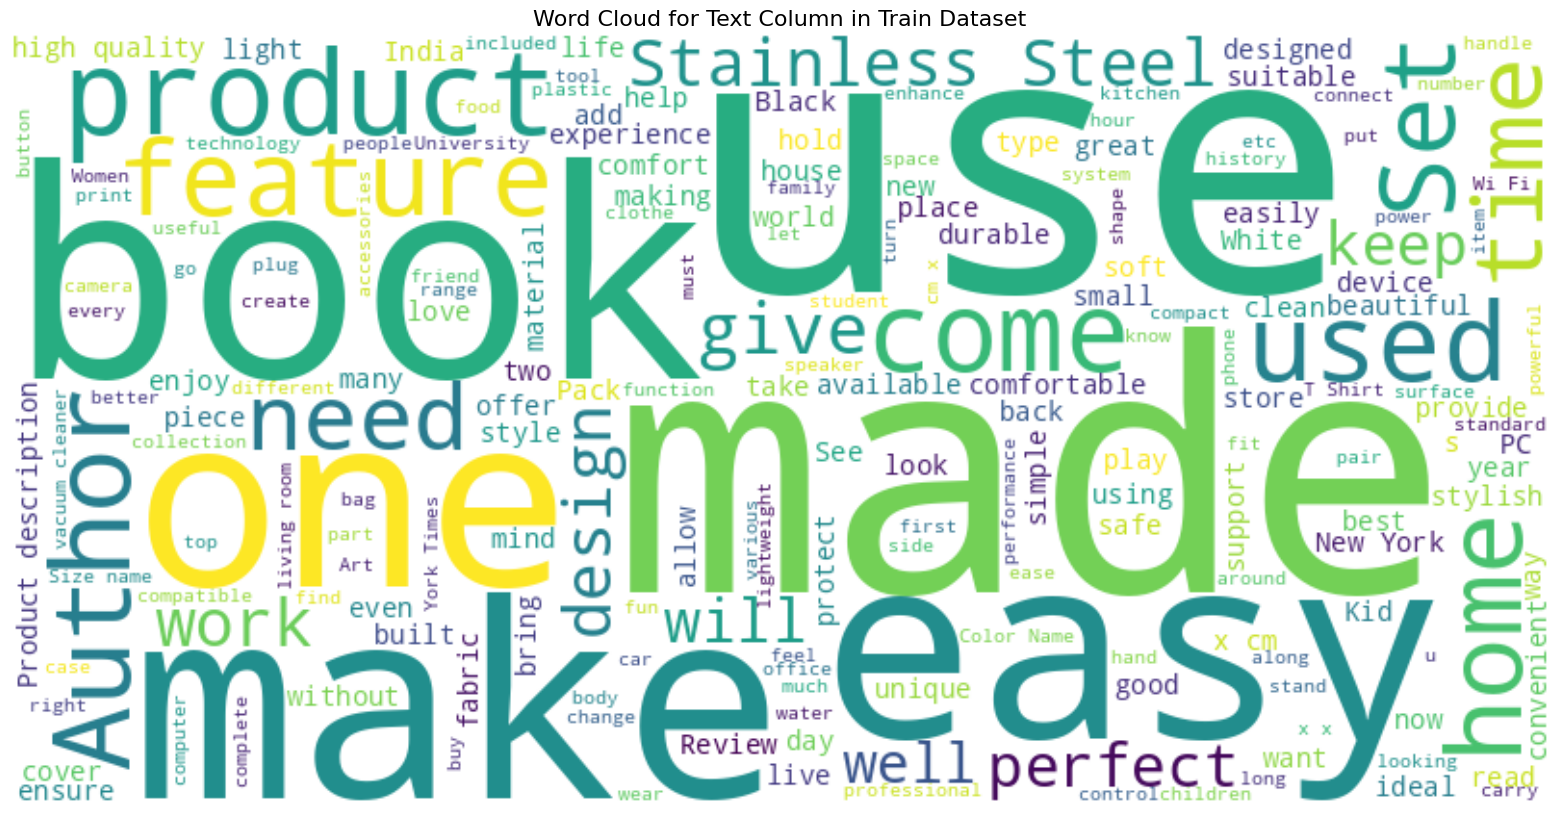

In [12]:
# Combine all text from the 'Text' column into a single string
text = ' '.join(train['Text'].dropna())  # Drop NA values to avoid errors

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    min_font_size=10,
    max_words=200
).generate(text)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Text Column in Train Dataset', fontsize=16)
plt.show()

## Check number of words in longest sentence

In [13]:
# --- Function to find longest sentence and word count ---
def find_longest_sentence_and_word_count(df, column_name):
    """
    Finds the longest sentence in a specified DataFrame column and counts its words.

    Args:
        df (pd.DataFrame): The DataFrame to search.
        column_name (str): The name of the text column.

    Returns:
        tuple: (longest_sentence_text, character_count, word_count)
               Returns (None, 0, 0) if the column is not found or is empty.
    """
    longest_sentence_text = None
    max_char_length = 0
    longest_sentence_word_count = 0

    if column_name in df.columns:
        for text_entry in df[column_name].dropna():
            if isinstance(text_entry, str):
                current_char_length = len(text_entry)
                if current_char_length > max_char_length:
                    max_char_length = current_char_length
                    longest_sentence_text = text_entry
                    # Count words by splitting the sentence by spaces
                    longest_sentence_word_count = len(text_entry.split())
        
        if longest_sentence_text:
            return longest_sentence_text, max_char_length, longest_sentence_word_count
        else:
            return None, 0, 0 # No sentences found
    else:
        print(f"Error: '{column_name}' column not found in the DataFrame.")
        return None, 0, 0

# --- Find and print for train_df ---
print("Finding longest sentence in 'Text' column of train_df...")
longest_train_sentence, train_char_count, train_word_count = find_longest_sentence_and_word_count(train, 'Text')
print(f"Longest sentence in train_df['Text'] (character length: {train_char_count}, word count: {train_word_count}):")

print("="*40 + "\n")

# --- Find and print for test_df ---
print("Finding longest sentence in 'Text' column of test_df...")
longest_test_sentence, test_char_count, test_word_count = find_longest_sentence_and_word_count(test, 'Text')
print(f"Longest sentence in test_df['Text'] (character length: {test_char_count}, word count: {test_word_count}):")

print("="*40 + "\n")


Finding longest sentence in 'Text' column of train_df...
Longest sentence in train_df['Text'] (character length: 50403, word count: 8181):

Finding longest sentence in 'Text' column of test_df...
Longest sentence in test_df['Text'] (character length: 47114, word count: 7724):



# Data Preprocessing

## Drop NaN rows

In [14]:
train = train.dropna()
test = test.dropna()
train.isnull().sum()

Label    0
Text     0
dtype: int64

## Drop duplicate rows

In [15]:
train = train.drop_duplicates()
test = test.drop_duplicates()
train[train.duplicated()]

Empty DataFrame
Columns: [Label, Text]
Index: []

## Text cleaning

In [16]:
# --- Text Preprocessing Function ---
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    """
    Performs text preprocessing: lowercasing, punctuation removal,
    tokenization, stop word removal, and stemming.
    """
    if not isinstance(text, str):
        return "" # Return empty string for non-string inputs (e.g., NaN)

    #  Convert to lowercase
    text = text.lower()
    
    #  Remove punctuation and numbers (keep only alphabetic characters)
    # Replaces any character not in a-z or A-Z with a space
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) # Keep spaces to separate words

    # Tokenize (split into words)
    words = text.split()

    # Remove stopwords and 5. Apply stemming
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    # Join words back into a single string
    return ' '.join(processed_words)
    
train['Text'] = train['Text'].apply(preprocess_text)
test['Text'] = test['Text'].apply(preprocess_text)
train

Label  \
39042  Clothing & Accessories   
47129             Electronics   
20273                   Books   
45775             Electronics   
7091                Household   
...                       ...   
44131             Electronics   
47191             Electronics   
21962                   Books   
37194  Clothing & Accessories   
860                 Household   

                                                    Text  
39042  baya check muffler scarf men women girl check ...  
47129  ulanzi dh l bracket handl gripe mic stand hot ...  
20273  penguin essenti famili anim review bewitch boo...  
45775  gizga essenti profession len pen clean pro sys...  
7091   calla bamboo bathtub caddi tray brown calla ba...  
...                                                  ...  
44131  decal design butterfli corner wall sticker pvc...  
47191  yantralay c shape dual hot shoe mount bracket ...  
21962  cfa level full set separ smart sheet note high...  
37194  qutto high waist mid thigh shaper women shapew...  
860    aashi enterpris ea jumbo adult swing hammock c...  

[24626 rows x 2 columns]

## Split feature and target label

In [17]:
x_train = train.drop('Label', axis=1) 
y_train = train['Label'] 
x_test = test.drop('Label', axis=1) 
y_test = test['Label'] 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24626, 1)
y_train shape: (24626,)
X_test shape: (8686, 1)
y_test shape: (8686,)


## Text Representation using TF-IDF

In [18]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    tokenizer=lambda x: x.split(),  # Simple tokenization by splitting on whitespace
    max_features=5000,  # Limit to top 5000 features
    stop_words='english',  # Remove common English stop words
    lowercase=True  # Convert all text to lowercase
)

# Fit and transform x_train
x_train = tfidf_vectorizer.fit_transform(x_train['Text'])

# Transform x_test using the fitted vectorizer (do not refit)
x_test = tfidf_vectorizer.transform(x_test['Text'])

# Convert to dense arrays for training transformer model
x_train = x_train.toarray()
x_test = x_test.toarray()

# Print shapes and sample to verify
print(f"x_train_tfidf shape: {x_train.shape}")
print(f"x_test_tfidf shape: {x_test.shape}")
print("Sample TF-IDF features for x_train (first 5 rows, first 5 columns):\n", x_train[:5, :5])
print("="*40 + "\n")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


x_train_tfidf shape: (24626, 5000)
x_test_tfidf shape: (8686, 5000)
Sample TF-IDF features for x_train (first 5 rows, first 5 columns):
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]



## Dimensionality Reduction using TruncatedSVD

In [19]:
# --- Dimensionality Reduction (TruncatedSVD) ---
# Define the number of components for dimensionality reduction
n_components = 128 # Choose a value smaller than max_features_val and divisible by num_heads (e.g., 512, 256)

print(f"Applying TruncatedSVD with n_components={n_components}...")
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Fit SVD on x_train and transform both x_train and x_test
x_train = svd.fit_transform(x_train)
x_test = svd.transform(x_test)

print(f"x_train shape after SVD: {x_train.shape}")
print(f"x_test shape after SVD: {x_test.shape}")
print("="*40 + "\n")

Applying TruncatedSVD with n_components=128...
x_train shape after SVD: (24626, 128)
x_test shape after SVD: (8686, 128)



## Encode Target Label

In [20]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder on y_train and transform y_train
# It's crucial to fit on the training data to learn all possible labels.
y_train = le.fit_transform(y_train)

# Transform y_test using the *fitted* encoder
# This ensures consistency with the labels learned from the training data.
y_test = le.transform(y_test)

print("\nEncoded y_train:", y_train)
print("Encoded y_test:", y_test)

# To see the mapping from encoded numbers back to original labels:
print("\nClasses learned by LabelEncoder:", le.classes_)


Encoded y_train: [1 2 0 ... 0 1 3]
Encoded y_test: [1 3 0 ... 0 3 0]

Classes learned by LabelEncoder: ['Books' 'Clothing & Accessories' 'Electronics' 'Household']


# Modeling

## Model Architecture, model building, and model training (Transformer with Keras)

In [21]:
# --- Transformer Architecture for Text Classification (Keras) ---
# Model Hyperparameters
feature_dim = x_train.shape[1] # Number of TF-IDF features (e.g., 5000)
num_heads = 4                  # Number of attention heads (must divide feature_dim)
ff_dim = 128                   # Hidden layer size in feed forward network inside transformer
dropout_rate = 0.1             # Dropout rate
num_classes = len(le.classes_)

# Ensure feature_dim is divisible by num_heads for MultiHeadSelfAttention
if feature_dim % num_heads != 0:
    print(f"Warning: feature_dim ({feature_dim}) is not divisible by num_heads ({num_heads}).")
    print("Consider adjusting num_heads or feature_dim to ensure divisibility.")

# Build the Transformer Model using the Functional API
inputs = keras.Input(shape=(feature_dim,), name="tfidf_input") # Input is the TF-IDF vector (batch_size, max_features)

# Expand dimensions to (batch_size, 1, feature_dim)
# This treats the entire TF-IDF vector as a sequence of length 1,
# where the embedding dimension is the number of TF-IDF features.
# This allows MultiHeadAttention to operate across the features.
x = layers.Reshape((1, feature_dim))(inputs) # Shape becomes (batch_size, 1, feature_dim)

# Transformer Encoder Block (simplified)
# MultiHeadAttention (Self-Attention)
# Pass 'x' as query, key, and value for self-attention
attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=feature_dim // num_heads)(x, x, x)

# Add & Norm 1 (Residual connection + Layer Normalization)
# Note: In a true Transformer, the residual connection is usually before the normalization.
# Here, we apply it after attention output and before normalization as per your original structure.
attn_output = layers.Dropout(dropout_rate)(attn_output)
out1 = layers.LayerNormalization(epsilon=1e-6)(x + attn_output) # Residual connection

# Feed-Forward Network
ffn_output = layers.Dense(ff_dim, activation='relu')(out1)
ffn_output = layers.Dropout(dropout_rate)(ffn_output)

# Add & Norm 2 (Residual connection + Layer Normalization)
transformer_output = layers.LayerNormalization(epsilon=1e-6)(out1 + ffn_output) # Residual connection

# Global pooling to reduce sequence dimension (from (batch_size, 1, feature_dim) to (batch_size, feature_dim))
x = layers.GlobalAveragePooling1D()(transformer_output)

# Dense layers for classification
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(num_classes, activation='softmax', name="output_layer")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs, name="transformer_text_classifier")

print(f"\n--- Keras Transformer Model Architecture for Text Classification ---")
model.summary()
print("="*40 + "\n")

# --- Model Compilation ---
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(), # Use sparse for integer labels
    metrics=['accuracy']
)

# --- Training Loop with Early Stopping ---
num_epochs = 200
patience = 5

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=patience,
    restore_best_weights=True,
    verbose=1
)

print("--- Starting Training with Early Stopping ---")
history = model.fit(
    x_train, y_train,
    epochs=num_epochs,
    validation_split=0.2, # Using test set as validation for simplicity, ideally use a separate validation set
    callbacks=[early_stopping_callback],
    verbose=1
)
print("\n--- Training Complete ---")
print("="*40 + "\n")


--- Keras Transformer Model Architecture for Text Classification ---


2025-07-25 15:06:43.670868: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "transformer_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ tfidf_input         │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 128)    │          0 │ tfidf_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 128)    │     66,048 │ reshape[0][0],    │
│ (MultiHeadAttentio… │                   │            │ reshape[0][0],    │
│                     │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 1, 128)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1, 128)    │          0 │ reshape[0][0],    │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 1, 128)    │        256 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1, 128)    │     16,512 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 1, 128)    │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 1, 128)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 128)    │        256 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 4)         │        260 │ dropout_3[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 91,588 (357.77 KB)

 Trainable params: 91,588 (357.77 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Training with Early Stopping ---
Epoch 1/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8383 - loss: 0.4828 - val_accuracy: 0.9253 - val_loss: 0.2685
Epoch 2/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9274 - loss: 0.2433 - val_accuracy: 0.9279 - val_loss: 0.2549
Epoch 3/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9332 - loss: 0.2284 - val_accuracy: 0.9296 - val_loss: 0.2541
Epoch 4/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9388 - loss: 0.2083 - val_accuracy: 0.9344 - val_loss: 0.2337
Epoch 5/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9437 - loss: 0.1983 - val_accuracy: 0.9332 - val_loss: 0.2466
Epoch 6/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9416 - loss: 0.2013 - val_accuracy: 0.9316 - val_loss: 0.2509
Epoch 7/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9463 - loss: 0.1805 - val_accuracy: 0.9328 - val_loss: 0.2399
Epoch 8/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/s

## Plotting Training History

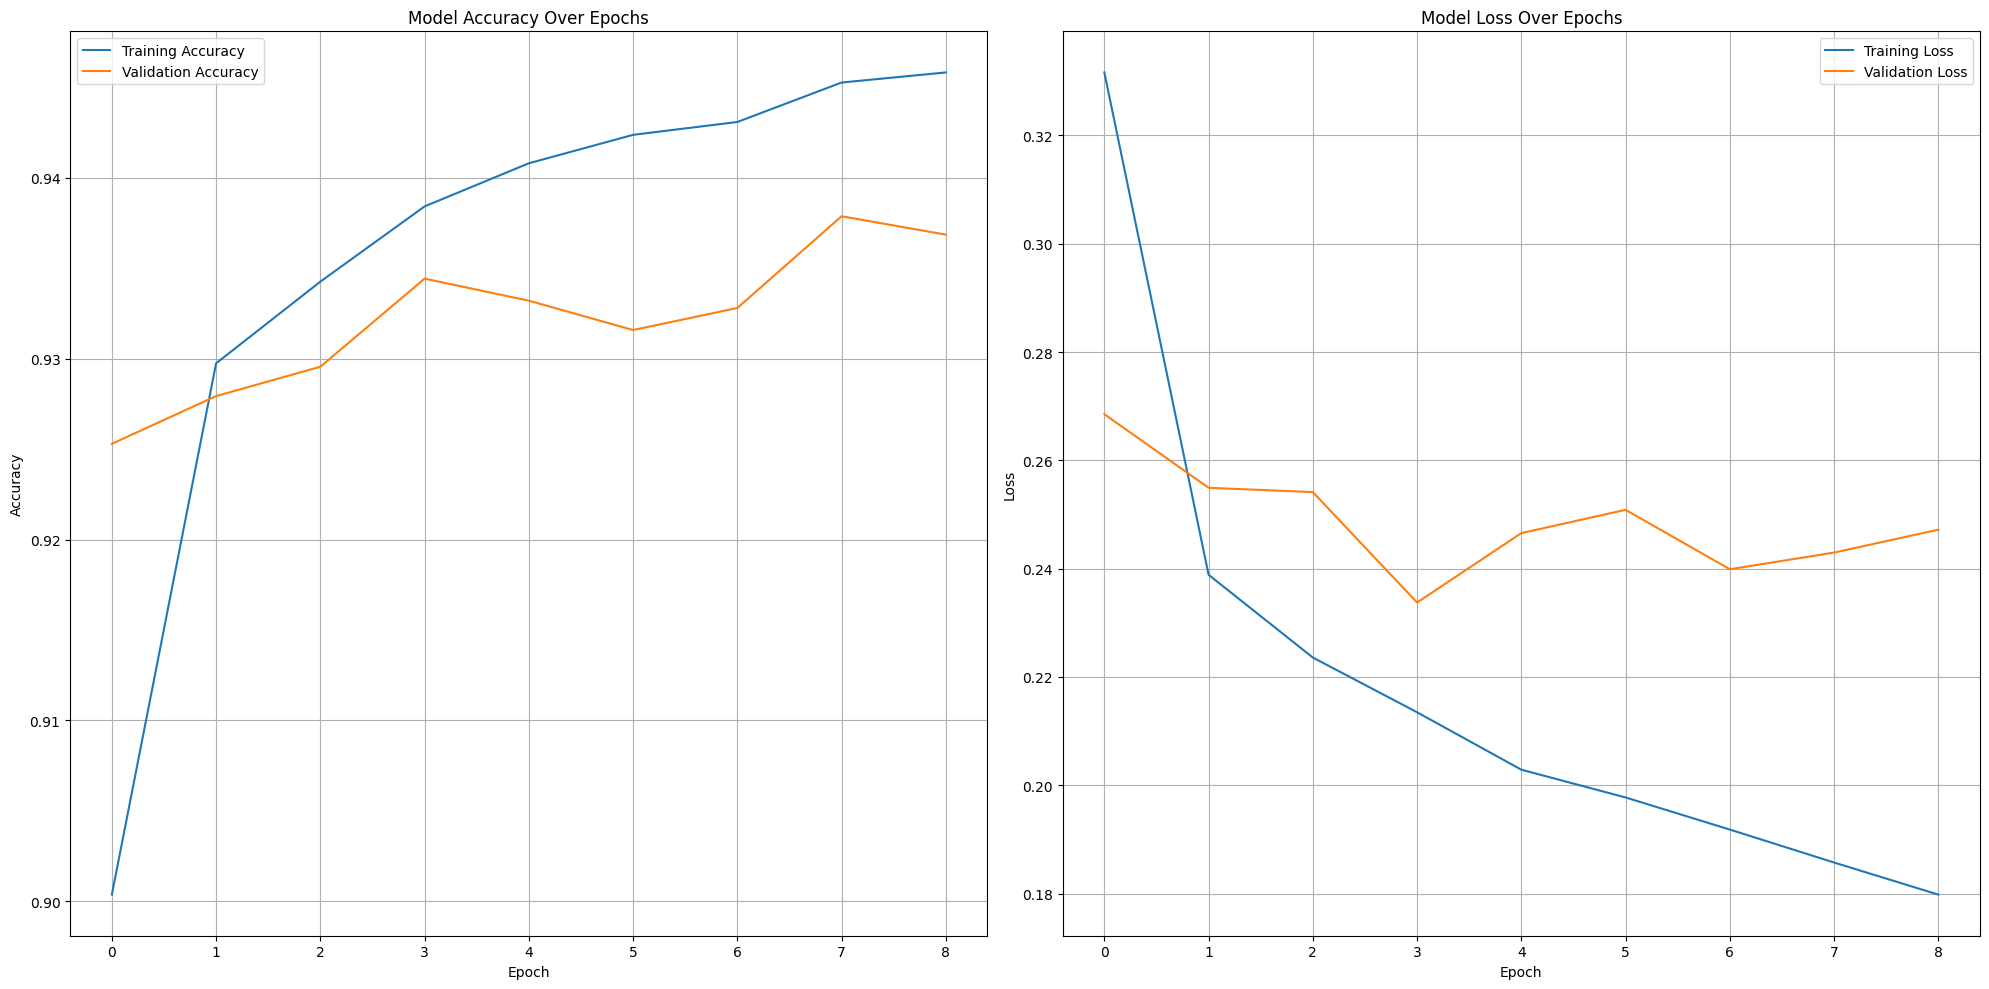

In [22]:
# --- Plotting Training History ---
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Decision Boundary of the model


--- Visualizing Transformer Latent Space (PCA of GlobalAveragePooling1D output) on Training Data ---
  1/770 ━━━━━━━━━━━━━━━━━━━━ 2:17 179ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['tfidf_input']
Received: inputs=Tensor(shape=(32, 128))
  warnings.warn(msg)


770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['tfidf_input']
Received: inputs=Tensor(shape=(None, 128))
  warnings.warn(msg)


770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step


/tmp/ipykernel_13/721832603.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_regions = plt.cm.get_cmap('viridis', num_classes)


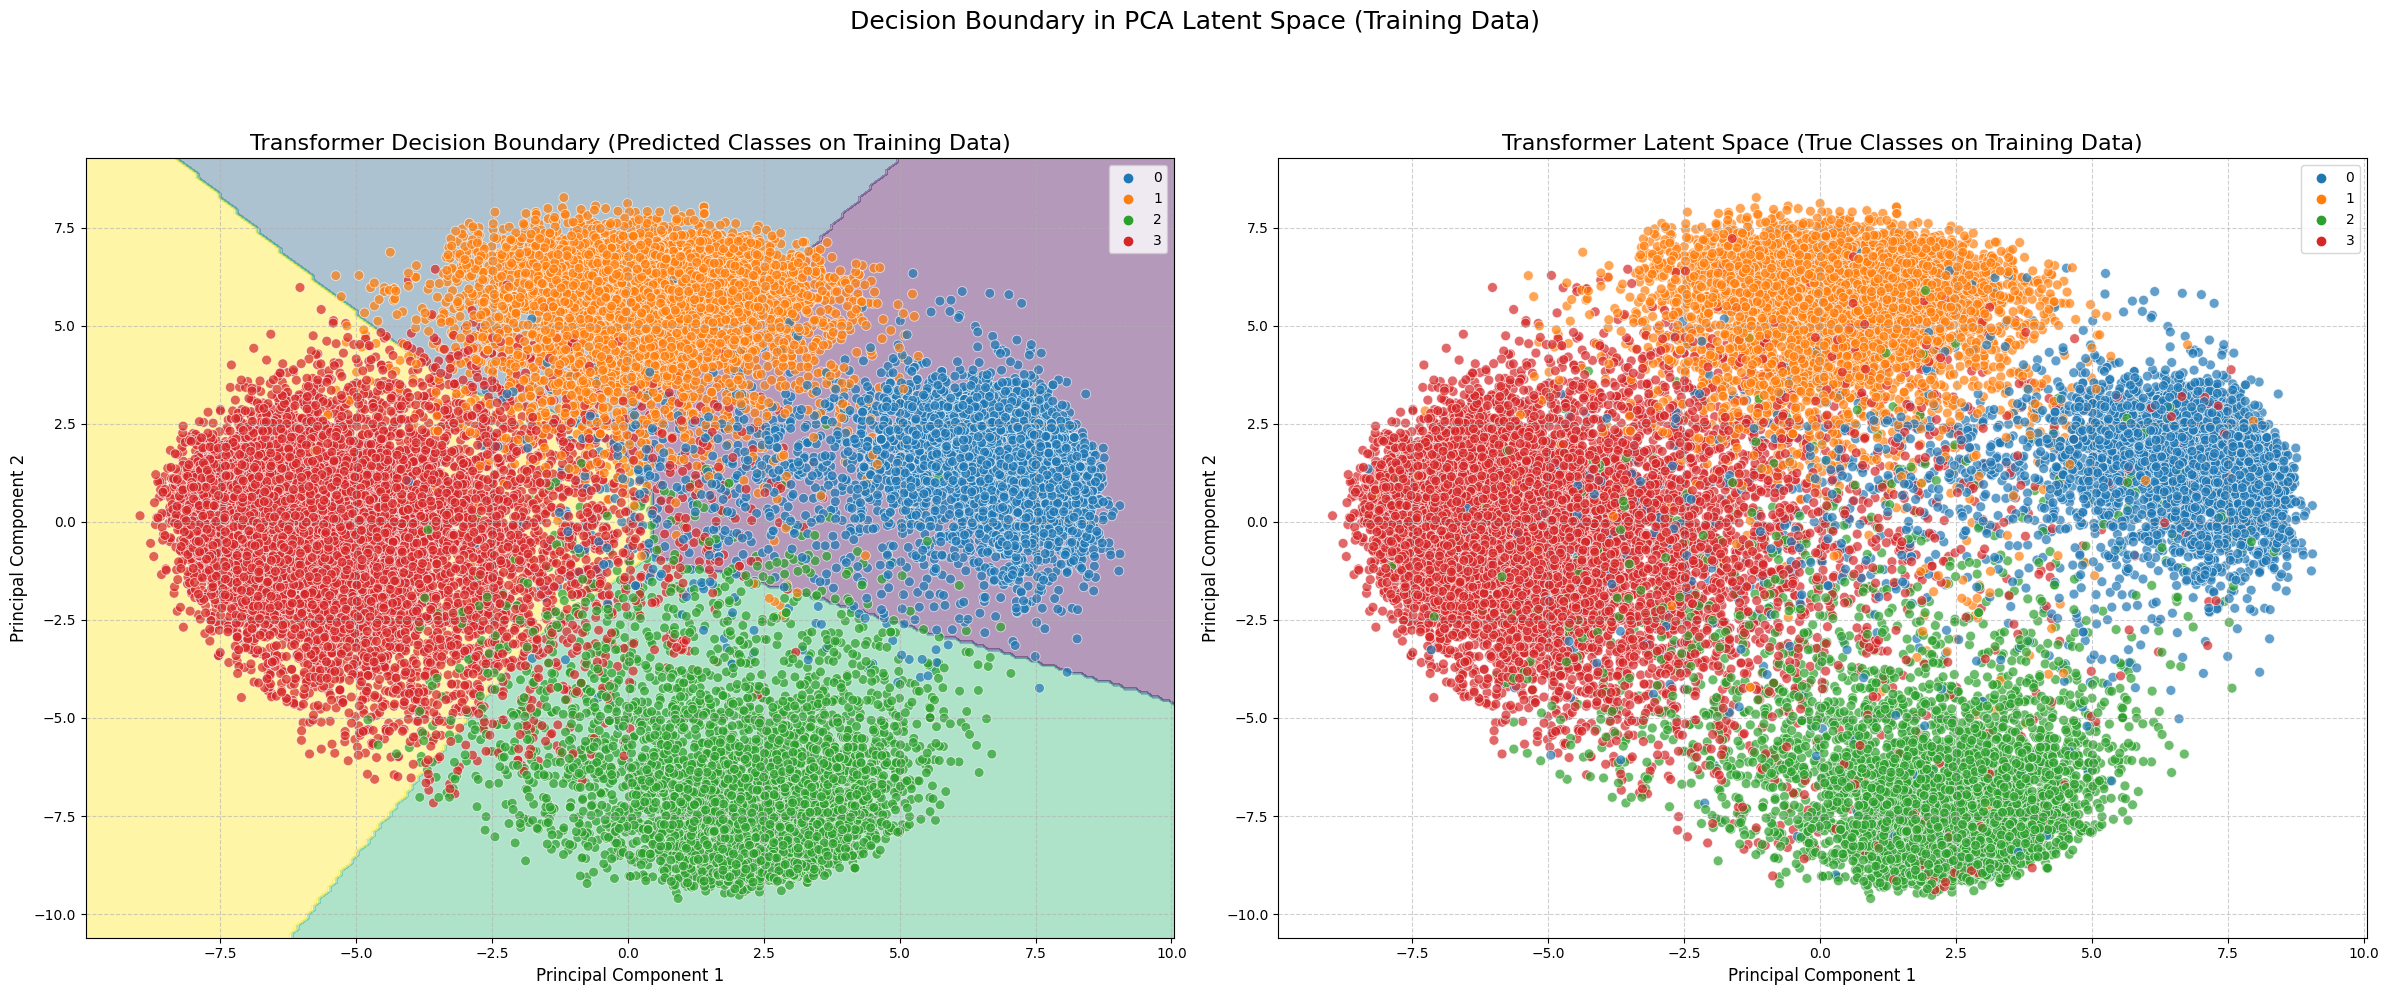

In [23]:
# --- Decision Boundary Plotting ---

print("\n--- Visualizing Transformer Latent Space (PCA of GlobalAveragePooling1D output) on Training Data ---")

# Correct layer names based on the traceback you provided in the previous turn
GLOBAL_POOLING_LAYER_NAME = "global_average_pooling1d"
DENSE_64_LAYER_NAME = "dense_1"
OUTPUT_LAYER_NAME = "output_layer"

# Create a sub-model to extract features from the 'global_average_pooling' layer
feature_extractor_for_pca = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(GLOBAL_POOLING_LAYER_NAME).output
)

# Create a sub-model for the classification head (from the dense_1 layer onwards)
input_to_dense_64 = model.get_layer(DENSE_64_LAYER_NAME).input
output_layer = model.get_layer(OUTPUT_LAYER_NAME).output

classification_head_model = keras.Model(
    inputs=input_to_dense_64,
    outputs=output_layer
)

# Extract features from the TRAINING set for PCA
# Use x_train here as input to the feature extractor
intermediate_features_train = feature_extractor_for_pca.predict(x_train) # Corrected input
true_labels_train = y_train

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
pca.fit(intermediate_features_train)
pca_features_train = pca.transform(intermediate_features_train)

# Get model predictions for the TRAINING set (for scatter plot coloring)
# Use x_train here for model prediction
predicted_labels_train = np.argmax(model.predict(x_train), axis=1) # Corrected input


# --- Plotting Decision Boundary ---
# Create a meshgrid over the 2D PCA feature space of the training data
x_min, x_max = pca_features_train[:, 0].min() - 1, pca_features_train[:, 0].max() + 1
y_min, y_max = pca_features_train[:, 1].min() - 1, pca_features_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Create a flattened meshgrid for prediction
meshgrid_points_2d = np.c_[xx.ravel(), yy.ravel()]

# Reconstruct the higher-dimensional features from the 2D PCA space
reconstructed_high_dim_features = pca.inverse_transform(meshgrid_points_2d)

# Get predictions from the model's classification head using the reconstructed features
outputs_meshgrid = classification_head_model.predict(reconstructed_high_dim_features)
Z = np.argmax(outputs_meshgrid, axis=1)
Z = Z.reshape(xx.shape)

# Define a color map for the decision regions
cmap_regions = plt.cm.get_cmap('viridis', num_classes)
# Define a color map for scatter plots
cmap_scatter = sns.color_palette("tab10", n_colors=num_classes)

# Create a single figure with two subplots for decision boundary visualization
fig_db, axes_db = plt.subplots(1, 2, figsize=(24, 10))

# Subplot 1: Decision Boundary with Predicted Class (Training Data)
ax_db1 = axes_db[0]
contourf_plot = ax_db1.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_regions)
sns.scatterplot(
    x=pca_features_train[:, 0],
    y=pca_features_train[:, 1],
    hue=predicted_labels_train,
    palette=cmap_scatter,
    legend='full',
    alpha=0.7,
    s=50,
    ax=ax_db1
)
ax_db1.set_title('Transformer Decision Boundary (Predicted Classes on Training Data)', fontsize=16)
ax_db1.set_xlabel('Principal Component 1', fontsize=12)
ax_db1.set_ylabel('Principal Component 2', fontsize=12)
ax_db1.grid(True, linestyle='--', alpha=0.6)
ax_db1.set_xlim(xx.min(), xx.max())
ax_db1.set_ylim(yy.min(), yy.max())

# Subplot 2: Latent Space with True Class (Training Data, without decision boundary regions)
ax_db2 = axes_db[1]
sns.scatterplot(
    x=pca_features_train[:, 0],
    y=pca_features_train[:, 1],
    hue=true_labels_train,
    palette=cmap_scatter,
    legend='full',
    alpha=0.7,
    s=50,
    ax=ax_db2
)
ax_db2.set_title('Transformer Latent Space (True Classes on Training Data)', fontsize=16)
ax_db2.set_xlabel('Principal Component 1', fontsize=12)
ax_db2.set_ylabel('Principal Component 2', fontsize=12)
ax_db2.grid(True, linestyle='--', alpha=0.6)
ax_db2.set_xlim(xx.min(), xx.max())
ax_db2.set_ylim(yy.min(), yy.max())

fig_db.suptitle('Decision Boundary in PCA Latent Space (Training Data)', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Model Architecture, model building, and model training (TF custom function)

In [24]:
# --- Transformer Architecture for Text Classification (TF custom function) ---

class MultiHeadSelfAttention(layers.Layer):
    """
    Custom Multi-Head Self-Attention layer.
    This layer computes attention scores between features within a sequence.
    """
    def __init__(self, embed_dim, num_heads=8, **kwargs):
        super(MultiHeadSelfAttention, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        
        # Ensure embedding dimension is divisible by number of heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads

        # Dense layers for query, key, and value projections
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        
        # Dense layer to combine attention heads
        self.combine_heads = layers.Dense(embed_dim)

    # Custom function for attention calculation
    def attention(self, query, key, value):
        """
        Calculates scaled dot-product attention using TensorFlow operations.
        """
        # Matmul query and key to get attention scores
        score = tf.matmul(query, key, transpose_b=True)
        # Scale scores by square root of key dimension
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        # Apply softmax to get attention weights
        weights = tf.nn.softmax(scaled_score, axis=-1)
        # Matmul weights and value to get the output
        output = tf.matmul(weights, value)
        return output, weights

    # Custom function for separating heads
    def separate_heads(self, x, batch_size):
        """
        Separates the input into multiple heads for multi-head attention using TensorFlow operations.
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3]) # Transpose to (batch_size, num_heads, seq_len, projection_dim)

    def call(self, inputs):
        """
        Forward pass for the MultiHeadSelfAttention layer.
        Inputs shape: (batch_size, sequence_length, embedding_dimension)
        In our case, sequence_length will be 1, and embedding_dimension will be max_features.
        """
        batch_size = tf.shape(inputs)[0]

        # Project inputs for query, key, and value
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # Separate into multiple heads
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)

        # Compute attention using the custom 'attention' function
        attention, weights = self.attention(query, key, value)
        
        # Concatenate heads
        attention = tf.transpose(attention, perm=[0, 2, 1, 3]) # Back to (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim)) # Combine heads
        
        # Final linear projection
        output = self.combine_heads(concat_attention)
        return output

    def get_config(self):
        """
        Required for saving and loading models that contain custom layers.
        """
        config = super(MultiHeadSelfAttention, self).get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
        })
        return config


class TransformerBlock(layers.Layer):
    """
    Custom Transformer Block layer.
    Combines Multi-Head Self-Attention, Feed-Forward Network, and Layer Normalization.
    """
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.rate = rate

        # Multi-Head Self-Attention layer (custom layer)
        self.att = MultiHeadSelfAttention(embed_dim=embed_dim, num_heads=num_heads)
        
        # Feed-Forward Network (custom sequential model)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        
        # Layer Normalization layers
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        
        # Dropout layers
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=None):
        """
        Forward pass for the TransformerBlock.
        Inputs shape: (batch_size, sequence_length, embedding_dimension)
        """
        # Self-attention part with residual connection and layer normalization
        attn_output = self.att(inputs) # Call custom MultiHeadSelfAttention layer
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm 1

        # Feed-forward part with residual connection and layer normalization
        ffn_output = self.ffn(out1) # Call custom Sequential FFN
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm 2

    def get_config(self):
        """
        Required for saving and loading models that contain custom layers.
        """
        config = super(TransformerBlock, self).get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "ff_dim": self.ff_dim,
            "rate": self.rate,
        })
        return config


# Model Hyperparameters
# Update feature_dim to the reduced dimension
feature_dim = n_components # Number of features after dimensionality reduction
num_heads = 4                  # Number of attention heads (must divide feature_dim)
ff_dim = 128                   # Hidden layer size in feed forward network inside transformer
dropout_rate = 0.1             # Dropout rate

# Ensure feature_dim is divisible by num_heads for MultiHeadSelfAttention
if feature_dim % num_heads != 0:
    print(f"Warning: feature_dim ({feature_dim}) is not divisible by num_heads ({num_heads}).")
    print("Consider adjusting num_heads or feature_dim to ensure divisibility.")

# Build the Transformer Model using the Functional API
inputs = keras.Input(shape=(feature_dim,), name="tfidf_input") # Input is the TF-IDF vector (batch_size, max_features)

# Expand dimensions to (batch_size, 1, feature_dim)
# This treats the entire TF-IDF vector as a sequence of length 1,
# where the embedding dimension is the number of TF-IDF features.
# This allows MultiHeadAttention to operate across the features.
x = layers.Reshape((1, feature_dim))(inputs) # Shape becomes (batch_size, 1, feature_dim)

# Apply Transformer Block (custom layer)
transformer_output = TransformerBlock(
    embed_dim=feature_dim, num_heads=num_heads, ff_dim=ff_dim, rate=dropout_rate
)(x)

# Squeeze back to (batch_size, feature_dim) for the dense classification head
x = layers.Lambda(lambda t: tf.squeeze(t, axis=1))(transformer_output) # Shape: (batch_size, feature_dim)

# Dense layers for classification
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(num_classes, activation='softmax', name="output_layer")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs, name="transformer_text_classifier")

print(f"\n--- Keras Transformer Model Architecture for Text Classification ---")
model.summary()
print("="*40 + "\n")

# --- Model Compilation ---
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(), # Use sparse for integer labels
    metrics=['accuracy']
)

# --- Training Loop with Early Stopping ---
num_epochs = 200
patience = 5

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=patience,
    restore_best_weights=True,
    verbose=1
)

print("--- Starting Training with Early Stopping ---")
history = model.fit(
    x_train, y_train,
    epochs=num_epochs,
    validation_split=0.2, # Using test set as validation for simplicity, ideally use a separate validation set
    callbacks=[early_stopping_callback],
    verbose=1
)
print("\n--- Training Complete ---")
print("="*40 + "\n")


--- Keras Transformer Model Architecture for Text Classification ---


Model: "transformer_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tfidf_input (InputLayer)        │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, None, 128)      │        99,584 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,100 (422.27 KB)

 Trainable params: 108,100 (422.27 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Training with Early Stopping ---
Epoch 1/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8456 - loss: 0.4535 - val_accuracy: 0.9273 - val_loss: 0.2587
Epoch 2/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9330 - loss: 0.2328 - val_accuracy: 0.9245 - val_loss: 0.2613
Epoch 3/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9338 - loss: 0.2222 - val_accuracy: 0.9259 - val_loss: 0.2703
Epoch 4/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9437 - loss: 0.1993 - val_accuracy: 0.9298 - val_loss: 0.2436
Epoch 5/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9412 - loss: 0.1958 - val_accuracy: 0.9344 - val_loss: 0.2518
Epoch 6/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9438 - loss: 0.1921 - val_accuracy: 0.9340 - val_loss: 0.2448
Epoch 7/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9462 - loss: 0.1882 - val_accuracy: 0.9356 - val_loss: 0.2369
Epoch 8/200
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/s

## Plotting Training History

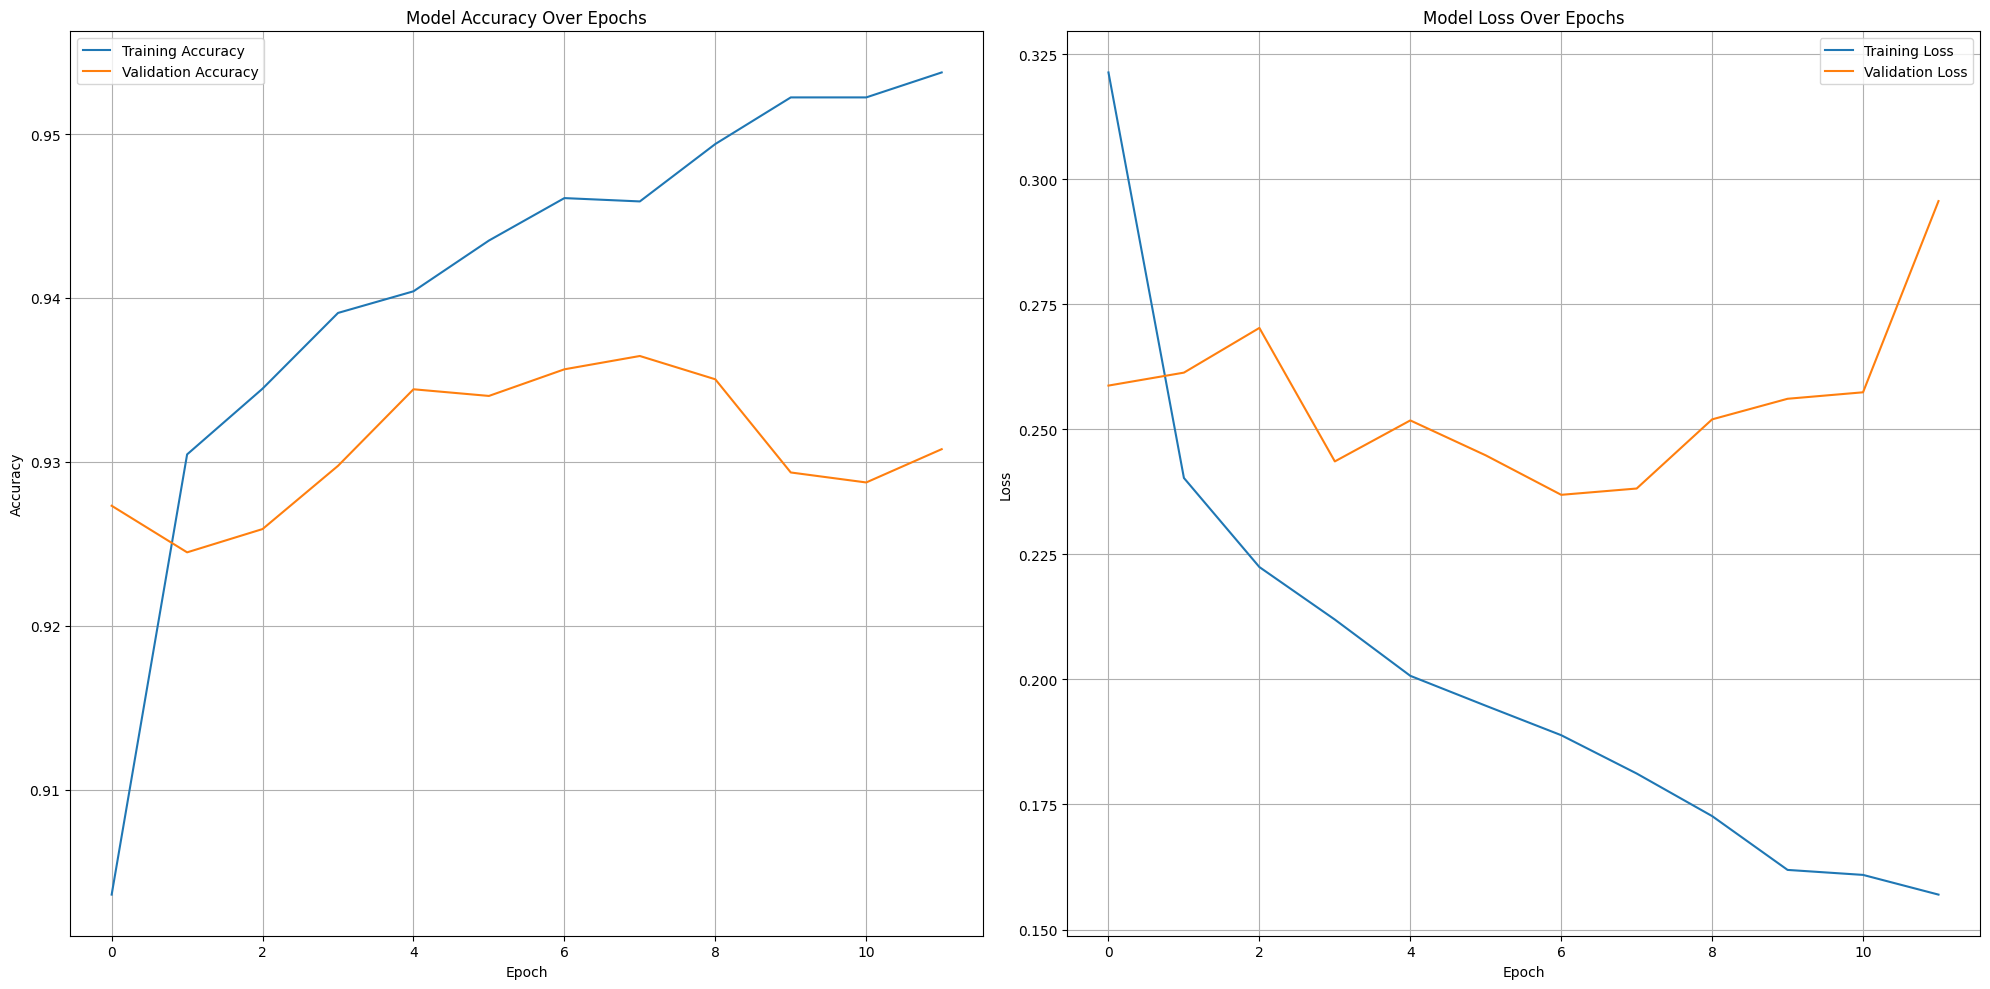

In [25]:
# --- Plotting Training History ---
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Decision Boundary of the model


--- Visualizing Transformer Latent Space (PCA of Lambda Layer output) on Training Data ---
  1/770 ━━━━━━━━━━━━━━━━━━━━ 2:50 222ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['tfidf_input']
Received: inputs=Tensor(shape=(32, 128))
  warnings.warn(msg)


770/770 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['tfidf_input']
Received: inputs=Tensor(shape=(None, 128))
  warnings.warn(msg)


770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step


/tmp/ipykernel_13/2332100366.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_regions = plt.cm.get_cmap('viridis', num_classes)


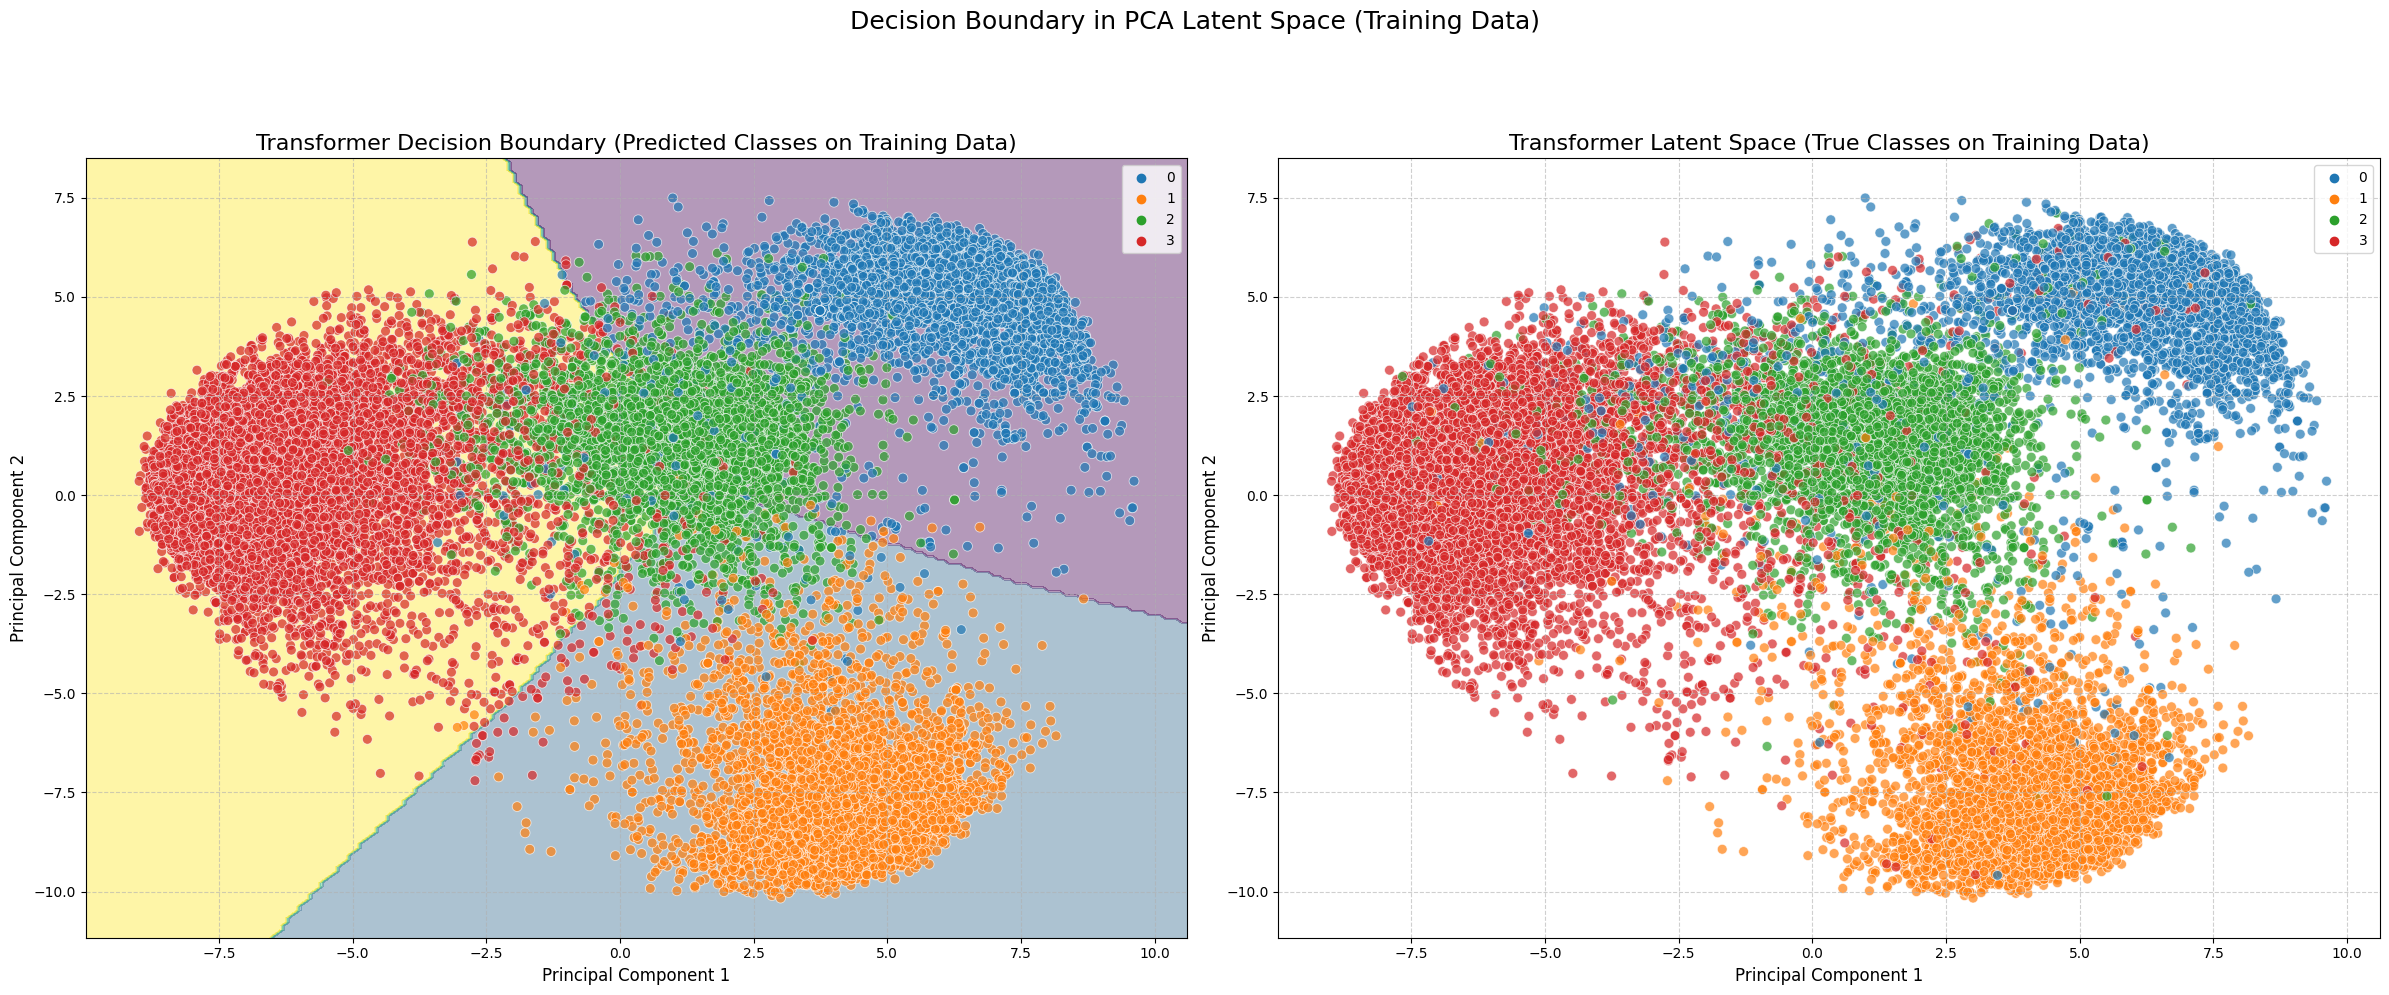

In [26]:
# --- Decision Boundary Plotting ---

print("\n--- Visualizing Transformer Latent Space (PCA of Lambda Layer output) on Training Data ---")

# Correct layer names based on the *latest* model summary/traceback
# The layer that provides the features for PCA is now the 'lambda' layer.
PCA_FEATURE_LAYER_NAME = "lambda"
DENSE_64_LAYER_NAME = "dense_8"
OUTPUT_LAYER_NAME = "output_layer"

# Create a sub-model to extract features from the 'lambda' layer
feature_extractor_for_pca = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(PCA_FEATURE_LAYER_NAME).output # Use the correct layer name
)

# Create a sub-model for the classification head (from the dense_8 layer onwards)
input_to_dense_64 = model.get_layer(DENSE_64_LAYER_NAME).input
output_layer_model = model.get_layer(OUTPUT_LAYER_NAME).output # Renamed variable to avoid conflict

classification_head_model = keras.Model(
    inputs=input_to_dense_64,
    outputs=output_layer_model
)

# Extract features from the TRAINING set for PCA
intermediate_features_train = feature_extractor_for_pca.predict(x_train) # Use x_train
true_labels_train = y_train

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
pca.fit(intermediate_features_train)
pca_features_train = pca.transform(intermediate_features_train)

# Get model predictions for the TRAINING set (for scatter plot coloring)
predicted_labels_train = np.argmax(model.predict(x_train), axis=1) # Use x_train


# --- Plotting Decision Boundary ---
x_min, x_max = pca_features_train[:, 0].min() - 1, pca_features_train[:, 0].max() + 1
y_min, y_max = pca_features_train[:, 1].min() - 1, pca_features_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

meshgrid_points_2d = np.c_[xx.ravel(), yy.ravel()]

# Reconstruct the higher-dimensional features from the 2D PCA space
reconstructed_high_dim_features = pca.inverse_transform(meshgrid_points_2d)

# Get predictions from the model's classification head using the reconstructed features
outputs_meshgrid = classification_head_model.predict(reconstructed_high_dim_features)
Z = np.argmax(outputs_meshgrid, axis=1)
Z = Z.reshape(xx.shape)

cmap_regions = plt.cm.get_cmap('viridis', num_classes)
cmap_scatter = sns.color_palette("tab10", n_colors=num_classes)

fig_db, axes_db = plt.subplots(1, 2, figsize=(24, 10))

# Subplot 1: Decision Boundary with Predicted Class (Training Data)
ax_db1 = axes_db[0]
contourf_plot = ax_db1.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_regions)
sns.scatterplot(
    x=pca_features_train[:, 0],
    y=pca_features_train[:, 1],
    hue=predicted_labels_train,
    palette=cmap_scatter,
    legend='full',
    alpha=0.7,
    s=50,
    ax=ax_db1
)
ax_db1.set_title('Transformer Decision Boundary (Predicted Classes on Training Data)', fontsize=16)
ax_db1.set_xlabel('Principal Component 1', fontsize=12)
ax_db1.set_ylabel('Principal Component 2', fontsize=12)
ax_db1.grid(True, linestyle='--', alpha=0.6)
ax_db1.set_xlim(xx.min(), xx.max())
ax_db1.set_ylim(yy.min(), yy.max())

# Subplot 2: Latent Space with True Class (Training Data, without decision boundary regions)
ax_db2 = axes_db[1]
sns.scatterplot(
    x=pca_features_train[:, 0],
    y=pca_features_train[:, 1],
    hue=true_labels_train,
    palette=cmap_scatter,
    legend='full',
    alpha=0.7,
    s=50,
    ax=ax_db2
)
ax_db2.set_title('Transformer Latent Space (True Classes on Training Data)', fontsize=16)
ax_db2.set_xlabel('Principal Component 1', fontsize=12)
ax_db2.set_ylabel('Principal Component 2', fontsize=12)
ax_db2.grid(True, linestyle='--', alpha=0.6)
ax_db2.set_xlim(xx.min(), xx.max())
ax_db2.set_ylim(yy.min(), yy.max())

fig_db.suptitle('Decision Boundary in PCA Latent Space (Training Data)', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Model Evaluation

In [27]:
# --- Final Evaluation on Test Set ---
print("\n--- Final Evaluation on Test Set ---")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print("="*40 + "\n")


--- Final Evaluation on Test Set ---
Test Loss: 0.1731
Test Accuracy: 0.9470



## Classification metrics

In [28]:
# --- Final Evaluation on Test Set and Performance Metrics  ---
print("\n--- Final Evaluation on Test Set and Performance Metrics ---")

# Use model.predict to get predictions and probabilities for the test set
# Keras models do not require a separate 'eval()' mode or 'torch.no_grad()'
# as these are handled internally by .predict() for inference.
y_pred_proba_test_np = model.predict(x_test) # Get probabilities for each class
y_pred_test_np = np.argmax(y_pred_proba_test_np, axis=1) # Get the class with the highest probability

# The true labels for the test set
y_true_test_np = y_test # Assuming y_test holds your true labels

# Calculate metrics
cm = confusion_matrix(y_true_test_np, y_pred_test_np)
accuracy = accuracy_score(y_true_test_np, y_pred_test_np)

# For precision, recall, f1, roc_auc, we use the same sklearn functions.
# 'macro' average is suitable for multi-class classification when classes are imbalanced.
# `zero_division=1` handles cases where a class has no samples predicted (or true samples).
precision = precision_score(y_true_test_np, y_pred_test_np, average='macro', zero_division=1)
recall = recall_score(y_true_test_np, y_pred_test_np, average='macro', zero_division=1)
f1 = f1_score(y_true_test_np, y_pred_test_np, average='macro', zero_division=1)

# roc_auc_score for multi-class requires `y_score` to be probabilities of each class
# 'ovr' (one-vs-rest) is a common strategy for multi-class AUC.
roc_auc_val = roc_auc_score(y_true_test_np, y_pred_proba_test_np, multi_class='ovr')

# Print the results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision (macro): {precision:.3f}")
print(f"Recall (macro): {recall:.3f}")
print(f"F1-score (macro): {f1:.3f}")
print(f"AUC-ROC (OvR): {roc_auc_val:.3f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_true_test_np, y_pred_test_np, zero_division=1))
print("="*40 + "\n")


--- Final Evaluation on Test Set and Performance Metrics ---
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.947
Precision (macro): 0.948
Recall (macro): 0.946
F1-score (macro): 0.947
AUC-ROC (OvR): 0.992

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2036
           1       0.96      0.97      0.97      1551
           2       0.93      0.93      0.93      1699
           3       0.94      0.96      0.95      3400

    accuracy                           0.95      8686
   macro avg       0.95      0.95      0.95      8686
weighted avg       0.95      0.95      0.95      8686




## Confusion matrix

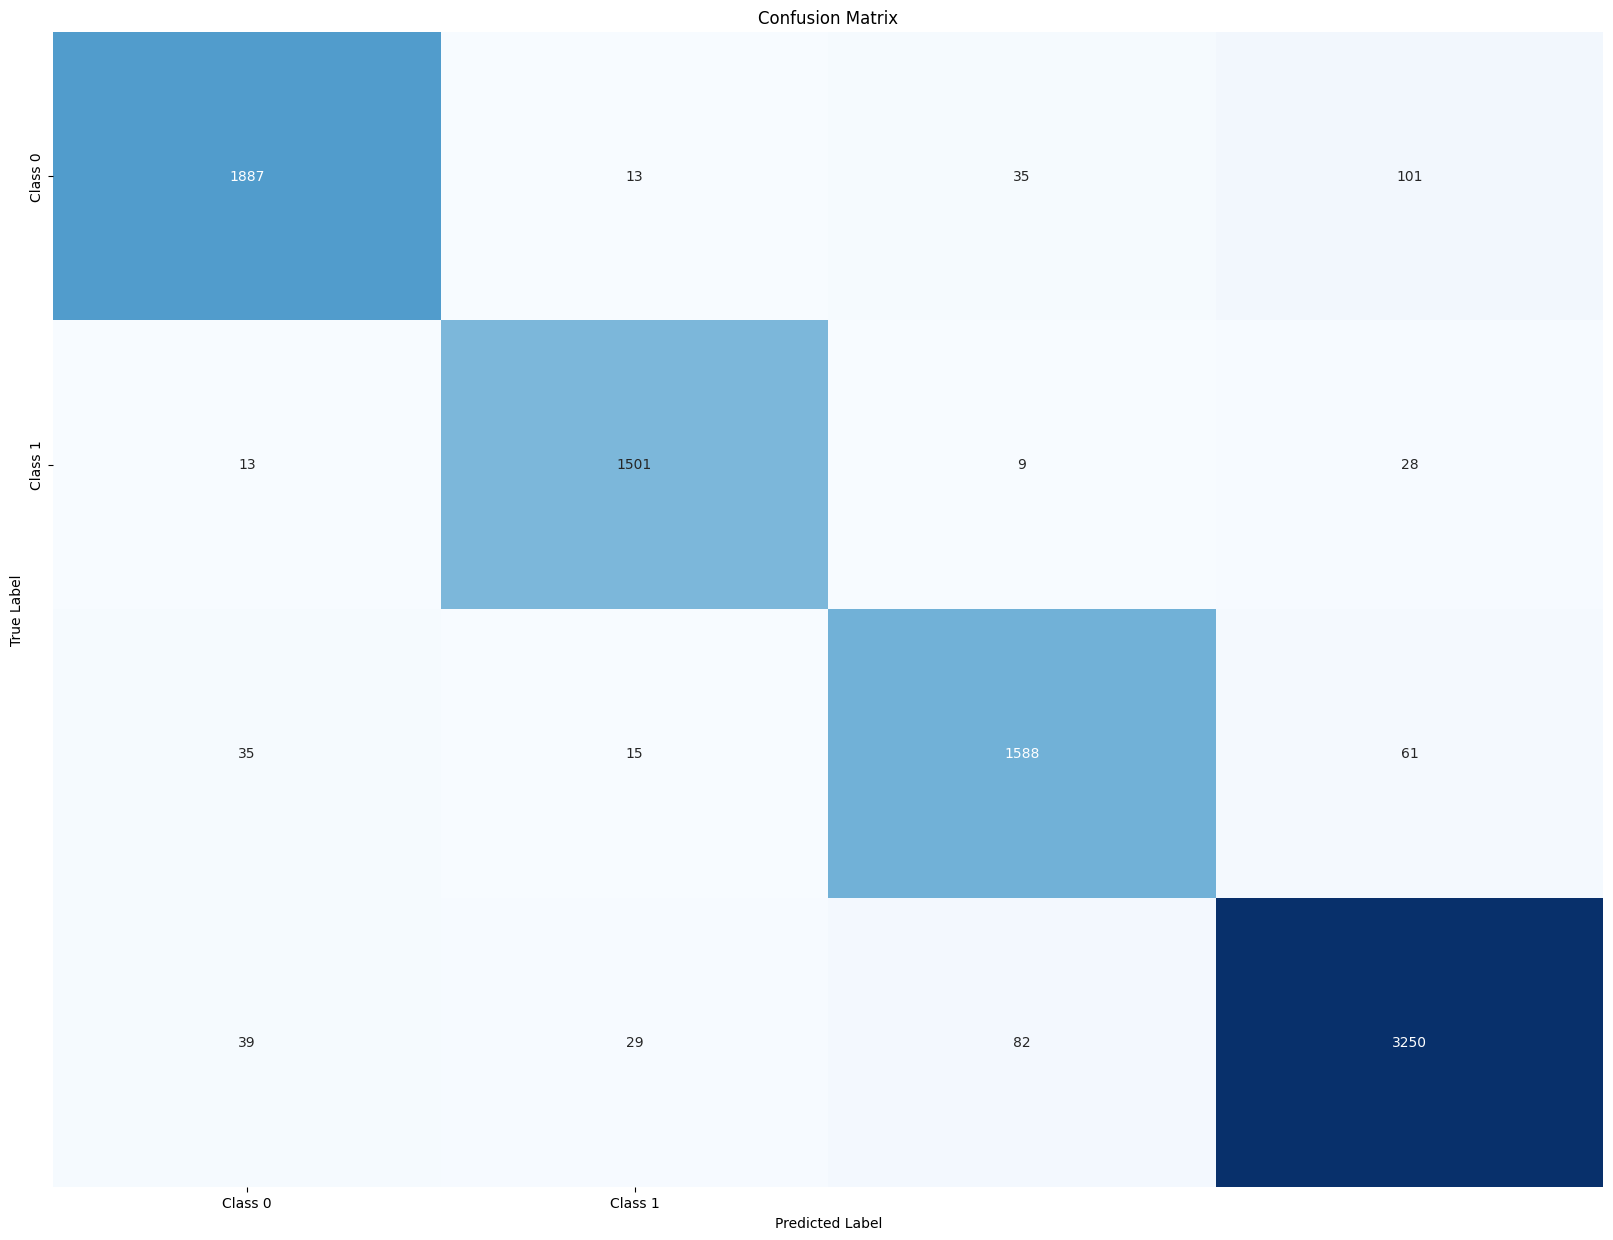

In [29]:
# --- Plotting Confusion Matrix ---
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Plotting Precision-Recall Curve


--- Plotting Precision-Recall Curve ---


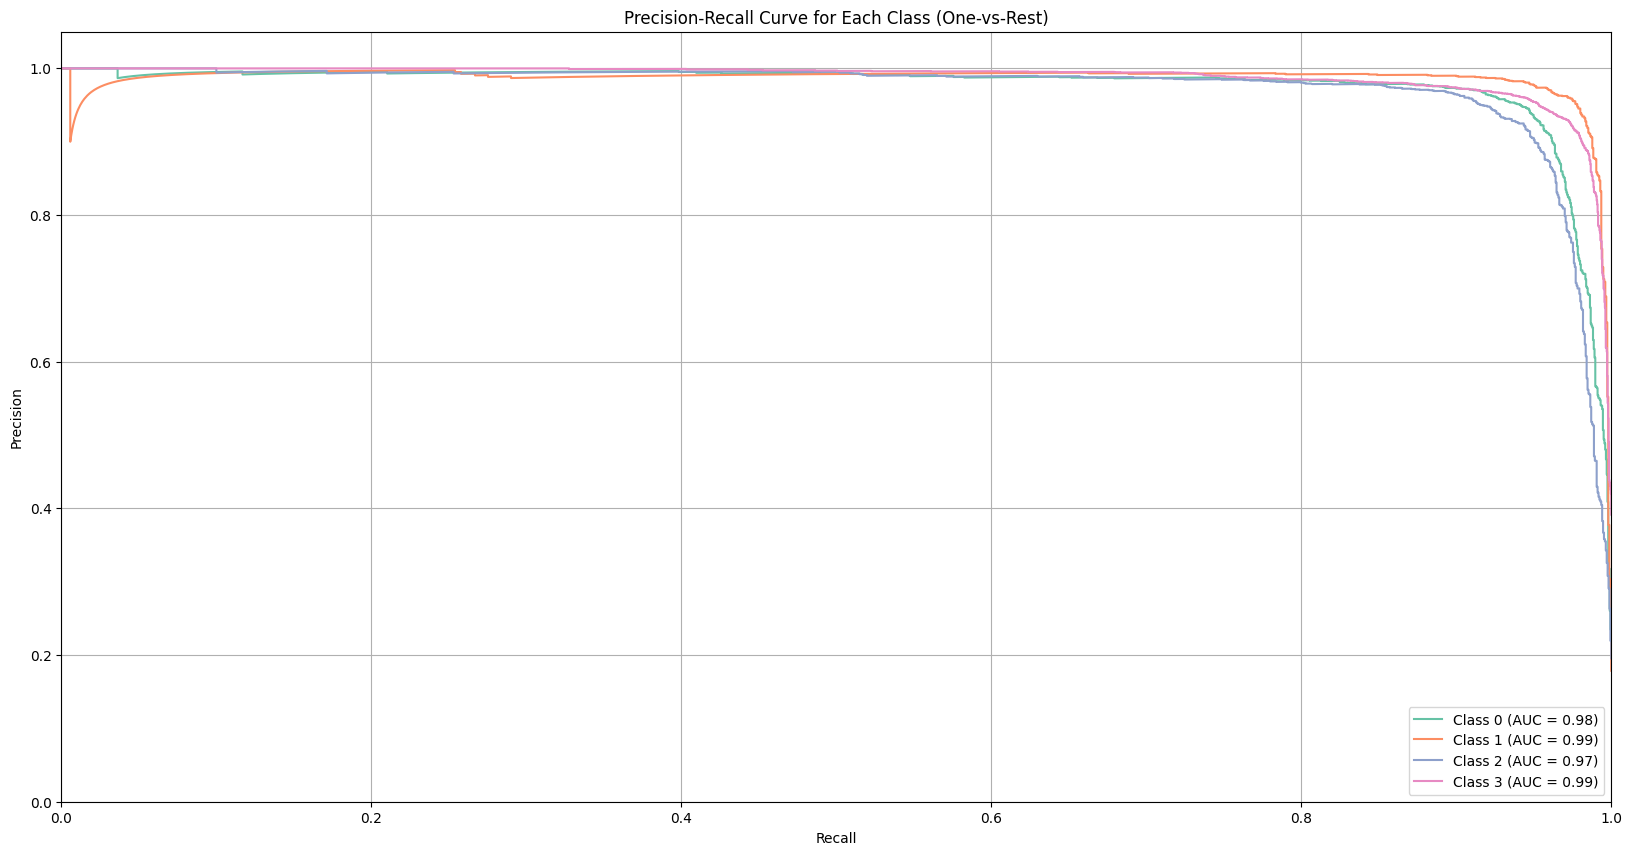

In [30]:
# --- Plotting Precision-Recall Curve (Rewritten for Keras) ---
print("\n--- Plotting Precision-Recall Curve ---")

# Define class labels
# For Keras model, num_classes is directly available from the model's output layer shape
# or from the 'num_classes' variable defined earlier.
# num_classes_pr = model.output_shape[-1] # Alternative way to get num_classes from model output
class_labels_pr = [str(i) for i in range(num_classes)] # Using the existing num_classes variable

# Initialize a plot
plt.figure(figsize=(20, 10))

# Set Seaborn color palette
sns.set_palette("Set2")

# y_pred_proba_test_np and y_true_test_np are already calculated from the Keras model's prediction

# Generate Precision-Recall curve for each class (One-vs-Rest)
for i, label_str in enumerate(class_labels_pr):
    class_val = int(label_str)

    # Create a binary array for the current class (1 if it's the class, 0 otherwise)
    y_test_bin = np.where(y_true_test_np == class_val, 1, 0)

    # Use the probabilities for the current class
    y_pred_score = y_pred_proba_test_np[:, class_val]

    # Compute Precision-Recall values
    precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_score)
    # Calculate AUC for the Precision-Recall curve
    pr_auc = auc(recall, precision)

    # Plot the curve
    plt.plot(recall, precision, label=f'Class {label_str} (AUC = {pr_auc:.2f})')

# Add plot details
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class (One-vs-Rest)")
plt.legend(loc="lower right")
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.grid(True) # Add a grid for better readability

# Show the plot
plt.show()

## Visualize Decision Boundary (Latent Space) on Test Data 


--- Visualizing Transformer Latent Space (PCA of Lambda layer output) on Test Data ---
  1/272 ━━━━━━━━━━━━━━━━━━━━ 57s 211ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['tfidf_input']
Received: inputs=Tensor(shape=(32, 128))
  warnings.warn(msg)


260/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['tfidf_input']
Received: inputs=Tensor(shape=(None, 128))
  warnings.warn(msg)


272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/tmp/ipykernel_13/2063221528.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_regions = plt.cm.get_cmap('viridis', num_classes)


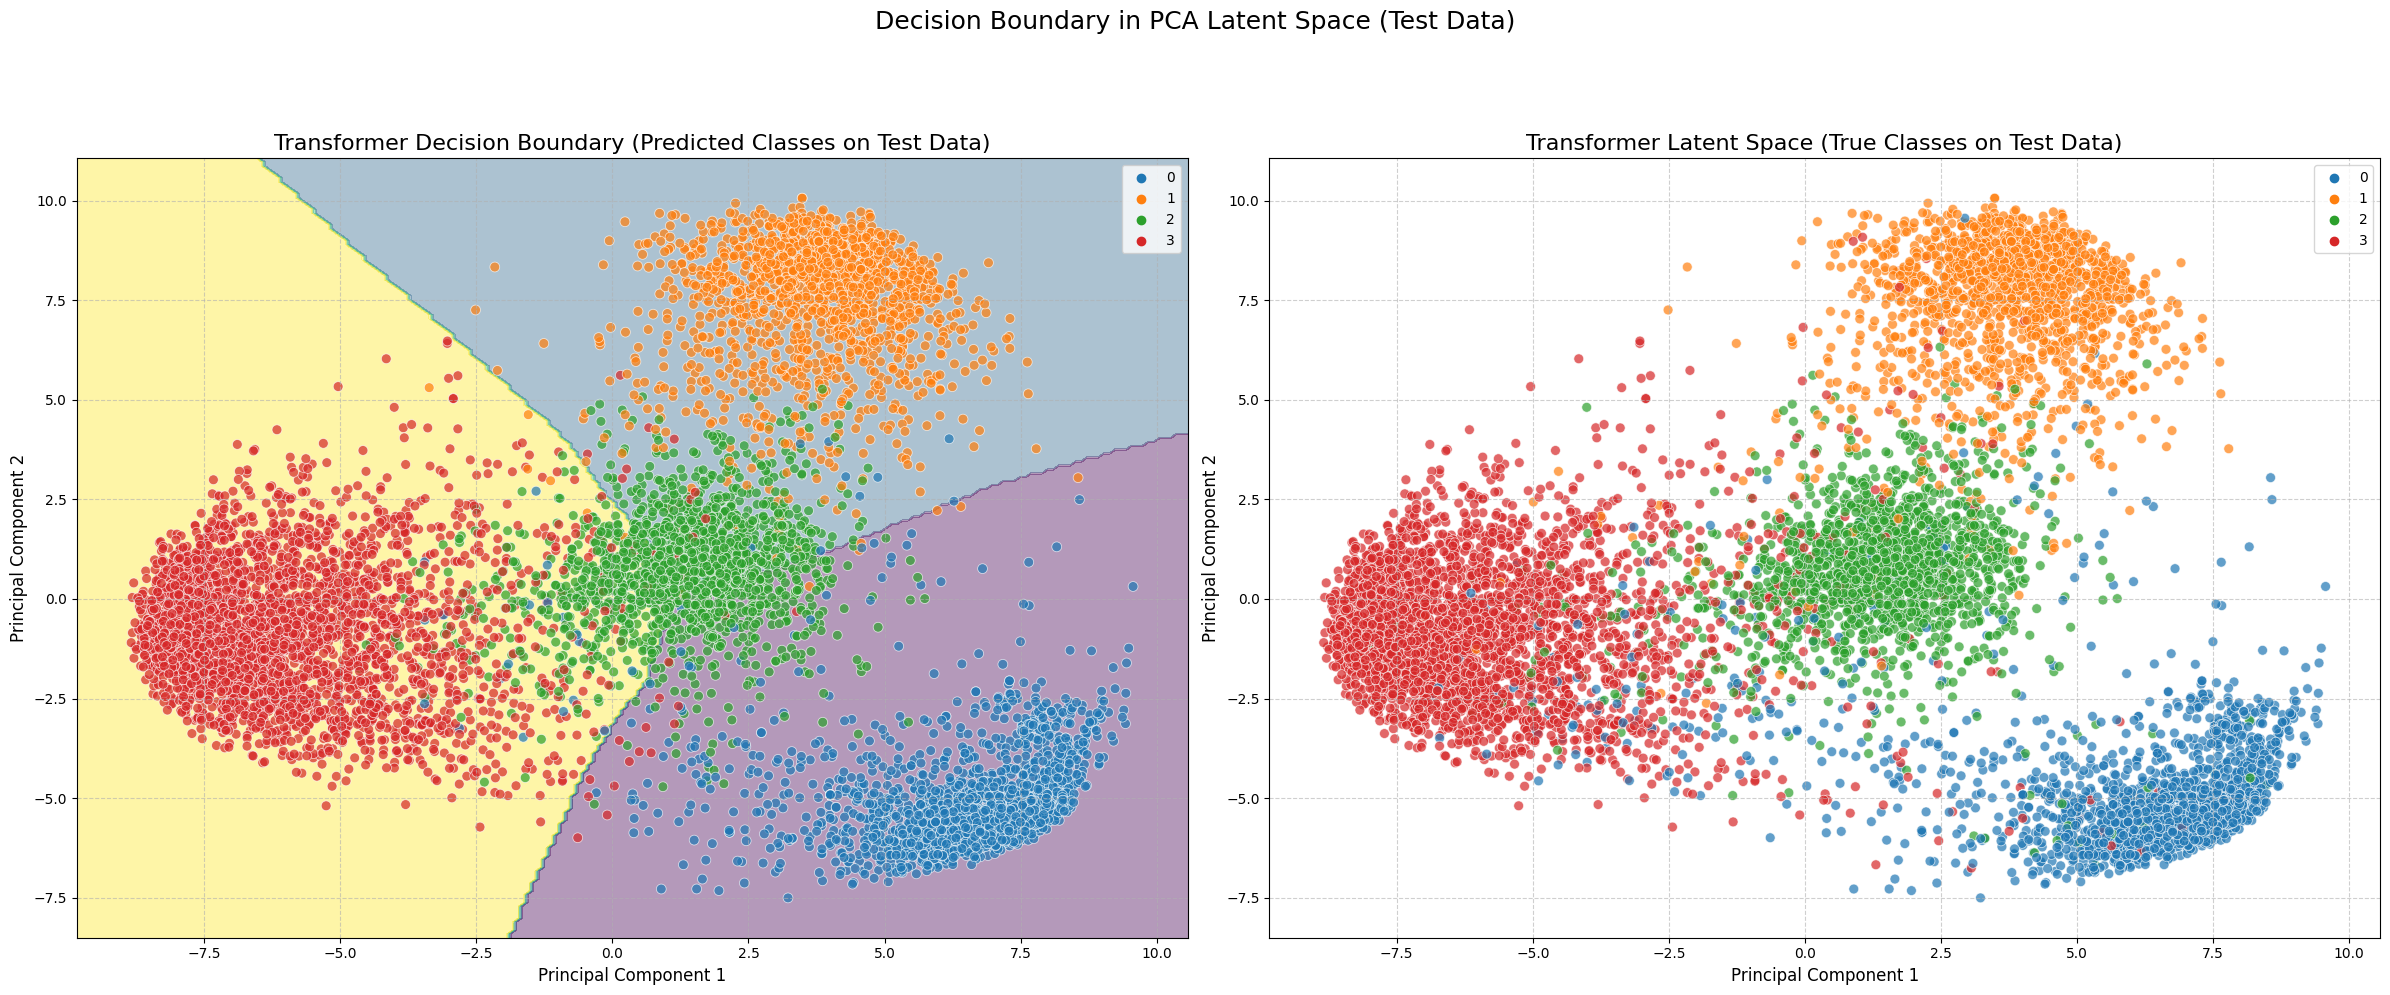

In [31]:
# --- Visualize Decision Boundary (Latent Space) on Test Data ---
print("\n--- Visualizing Transformer Latent Space (PCA of Lambda layer output) on Test Data ---")

# Correct layer names based on the *latest* model summary
PCA_FEATURE_LAYER_NAME = "lambda" # This is the layer whose output you want to use for PCA
DENSE_64_LAYER_NAME = "dense_8"   # This is the first dense layer in the classification head
OUTPUT_LAYER_NAME = "output_layer" # This is the final output layer

# Create a sub-model to extract features from the 'lambda' layer
feature_extractor_for_pca = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(PCA_FEATURE_LAYER_NAME).output
)

# Create a sub-model for the classification head (from the dense_8 layer onwards)
input_to_dense_64 = model.get_layer(DENSE_64_LAYER_NAME).input
output_layer_for_head = model.get_layer(OUTPUT_LAYER_NAME).output # Renamed to avoid confusion

classification_head_model = keras.Model(
    inputs=input_to_dense_64,
    outputs=output_layer_for_head
)

# Extract intermediate features from the TEST set for PCA
# Use x_test here as input to the feature extractor
intermediate_features_test = feature_extractor_for_pca.predict(x_test)
true_labels_test = y_test

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
pca.fit(intermediate_features_test)
pca_features_test = pca.transform(intermediate_features_test)

# Get model predictions for the TEST set
# Use x_test here for model prediction
predicted_labels_test = np.argmax(model.predict(x_test), axis=1)

# --- Plotting Decision Boundary ---
x_min, x_max = pca_features_test[:, 0].min() - 1, pca_features_test[:, 0].max() + 1
y_min, y_max = pca_features_test[:, 1].min() - 1, pca_features_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

meshgrid_points_2d = np.c_[xx.ravel(), yy.ravel()]

# Reconstruct higher-dimensional features from 2D PCA space
reconstructed_high_dim_features = pca.inverse_transform(meshgrid_points_2d)

# Get predictions from the model's classification head using the reconstructed features
outputs_meshgrid = classification_head_model.predict(reconstructed_high_dim_features)
Z = np.argmax(outputs_meshgrid, axis=1)
Z = Z.reshape(xx.shape)

cmap_regions = plt.cm.get_cmap('viridis', num_classes)
cmap_scatter = sns.color_palette("tab10", n_colors=num_classes)

fig_db, axes_db = plt.subplots(1, 2, figsize=(24, 10))

# Subplot 1: Decision Boundary with Predicted Class (Test Data)
ax_db1 = axes_db[0]
contourf_plot = ax_db1.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_regions)
sns.scatterplot(
    x=pca_features_test[:, 0],
    y=pca_features_test[:, 1],
    hue=predicted_labels_test,
    palette=cmap_scatter,
    legend='full',
    alpha=0.7,
    s=50,
    ax=ax_db1
)
ax_db1.set_title('Transformer Decision Boundary (Predicted Classes on Test Data)', fontsize=16)
ax_db1.set_xlabel('Principal Component 1', fontsize=12)
ax_db1.set_ylabel('Principal Component 2', fontsize=12)
ax_db1.grid(True, linestyle='--', alpha=0.6)
ax_db1.set_xlim(xx.min(), xx.max())
ax_db1.set_ylim(yy.min(), yy.max())

# Subplot 2: Latent Space with True Class (Test Data, without decision boundary regions)
ax_db2 = axes_db[1]
sns.scatterplot(
    x=pca_features_test[:, 0],
    y=pca_features_test[:, 1],
    hue=true_labels_test,
    palette=cmap_scatter,
    legend='full',
    alpha=0.7,
    s=50,
    ax=ax_db2
)
ax_db2.set_title('Transformer Latent Space (True Classes on Test Data)', fontsize=16)
ax_db2.set_xlabel('Principal Component 1', fontsize=12)
ax_db2.set_ylabel('Principal Component 2', fontsize=12)
ax_db2.grid(True, linestyle='--', alpha=0.6)
ax_db2.set_xlim(xx.min(), xx.max())
ax_db2.set_ylim(yy.min(), yy.max())

fig_db.suptitle('Decision Boundary in PCA Latent Space (Test Data)', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()